In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import losses,metrics
from tensorflow.keras.models import Sequential

In [0]:
from google.colab import files
uploaded=files.upload()

In [0]:
train_data_frame=pd.read_csv('train.csv',delimiter=',')

In [107]:
train_data_frame.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


In [108]:
train_data_frame.tail()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
9995,11,1,0.49,5,5.0,13.0,0.919971,329.66,1,1029600.0,4,11493
9996,10,0,0.52,2,14.0,28.0,0.433921,348.74,1,1047200.0,3,305
9997,7,1,0.13,2,25.0,42.0,0.470631,366.76,1,941600.0,3,612
9998,10,1,0.42,2,21.0,84.0,0.662996,348.74,1,836000.0,2,4963
9999,8,1,0.24,2,15.0,105.0,0.423642,355.10,1,862400.0,2,9387


In [109]:
train_data_frame.describe()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,8.317800,0.524100,0.270548,2.50230,15.754300,46.534600,0.486639,350.885758,0.891300,9.174874e+05,2.616600,6266.554200
std,1.748802,0.500244,0.196434,1.31178,10.388906,34.012649,0.134552,16.285744,0.329082,9.271764e+04,0.802788,3610.170288
min,5.000000,0.000000,0.000000,1.00000,1.000000,6.000000,0.000000,290.440000,0.000000,7.392000e+05,1.000000,2.000000
25%,7.000000,0.000000,0.090000,2.00000,7.000000,21.000000,0.406021,340.260000,1.000000,8.360000e+05,2.000000,3139.750000
50%,8.000000,1.000000,0.260000,2.00000,13.000000,37.000000,0.486784,350.860000,1.000000,8.976000e+05,3.000000,6280.500000
75%,9.000000,1.000000,0.430000,3.00000,21.000000,62.000000,0.567548,360.400000,1.000000,9.768000e+05,3.000000,9391.500000
max,16.000000,2.000000,1.000000,16.00000,72.000000,289.000000,1.000000,425.060000,2.000000,1.311200e+06,5.000000,12500.000000


In [110]:
train_data_frame.dtypes


Allied_Nations                    int64
Diplomatic_Meetings_Set           int64
Percent_Of_Forces_Mobilized     float64
Hostile_Nations                   int64
Active_Threats                  float64
Inactive_Threats                float64
Citizen_Fear_Index              float64
Closest_Threat_Distance(km)     float64
Aircraft_Carriers_Responding      int64
Troops_Mobilized(thousands)     float64
DEFCON_Level                      int64
ID                                int64
dtype: object

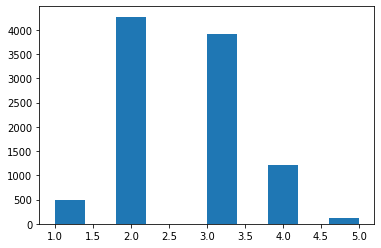

In [111]:
import matplotlib.pyplot as plt
plt.hist(train_data_frame['DEFCON_Level'])
plt.show()

In [112]:
dfl5=train_data_frame[train_data_frame['DEFCON_Level']==5]
dfl5

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
58,8,0,0.42,2,9.0,17.0,0.379589,345.56,1,1100000.0,5,1564
349,9,0,0.39,2,12.0,31.0,0.310573,332.84,1,994400.0,5,12005
477,10,0,0.45,6,5.0,13.0,0.508811,336.02,1,1056000.0,5,10964
536,6,0,0.25,2,33.0,84.0,0.053598,351.92,1,1188000.0,5,5032
595,8,0,0.49,2,33.0,125.0,0.332599,348.74,1,1091200.0,5,10119
...,...,...,...,...,...,...,...,...,...,...,...,...
9561,10,0,0.43,3,4.0,10.0,0.508811,342.38,1,968000.0,5,507
9614,8,0,0.40,2,6.0,16.0,0.379589,346.62,1,1038400.0,5,2557
9662,10,0,0.50,2,13.0,19.0,0.445668,343.44,1,976800.0,5,82
9826,8,0,0.34,3,6.0,11.0,0.538179,350.86,1,924000.0,5,2533


In [113]:
dfl4=train_data_frame[train_data_frame['DEFCON_Level']==4]
dfl4

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
6,7,1,0.08,2,42.0,52.0,0.357562,349.80,1,1038400.0,4,4717
7,8,1,0.10,2,34.0,45.0,0.378120,348.74,1,1038400.0,4,8008
12,10,0,0.73,6,6.0,17.0,0.508811,334.96,1,994400.0,4,3629
14,7,1,0.31,4,51.0,140.0,0.429515,347.68,1,1038400.0,4,4028
...,...,...,...,...,...,...,...,...,...,...,...,...
9939,7,0,0.30,3,16.0,80.0,0.357562,334.96,1,1020800.0,4,1408
9942,9,1,0.30,2,4.0,15.0,0.582232,346.62,1,950400.0,4,9138
9955,6,1,0.00,2,9.0,22.0,0.532305,387.96,1,871200.0,4,6371
9978,9,0,0.40,3,7.0,13.0,0.477974,344.50,1,994400.0,4,4986


In [114]:
dfl3=train_data_frame[train_data_frame['DEFCON_Level']==3]
dfl3

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
13,6,0,0.00,2,27.0,60.0,0.428047,365.70,1,968000.0,3,2451
19,13,0,0.49,6,10.0,24.0,0.831865,325.42,1,1056000.0,3,2938
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,7,1,0.07,3,6.0,18.0,0.450073,364.64,1,950400.0,3,193
9992,13,1,0.45,6,19.0,64.0,0.964023,349.80,1,950400.0,3,9869
9993,10,1,0.31,2,30.0,92.0,0.802496,341.32,1,915200.0,3,5842
9996,10,0,0.52,2,14.0,28.0,0.433921,348.74,1,1047200.0,3,305


In [115]:
dfl2=train_data_frame[train_data_frame['DEFCON_Level']==2]
dfl2

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054
5,6,1,0.10,2,4.0,11.0,0.508811,387.96,1,880000.0,2,10947
8,10,0,0.65,7,18.0,39.0,0.656388,333.90,1,959200.0,2,8179
9,8,0,0.29,3,18.0,58.0,0.618943,349.80,1,800800.0,2,6324
10,7,0,0.30,2,35.0,53.0,0.430984,342.38,1,844800.0,2,3789
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,10,0,0.50,2,20.0,121.0,0.665932,356.16,1,809600.0,2,3380
9991,7,0,0.22,2,21.0,51.0,0.420705,354.04,1,818400.0,2,12323
9994,9,0,0.30,2,20.0,72.0,0.501468,332.84,1,862400.0,2,11039
9998,10,1,0.42,2,21.0,84.0,0.662996,348.74,1,836000.0,2,4963


In [116]:
dfl1=train_data_frame[train_data_frame['DEFCON_Level']==1]
dfl1

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
16,8,1,0.00,1,6.0,13.0,0.412628,358.28,0,836000.0,1,20
18,7,1,0.00,2,4.0,8.0,0.457416,355.10,1,959200.0,1,2765
49,8,0,0.48,3,39.0,106.0,0.523495,349.80,1,800800.0,1,11278
84,8,1,0.06,2,5.0,11.0,0.457416,356.16,1,880000.0,1,10362
95,8,1,0.00,4,5.0,14.0,0.611601,356.16,0,836000.0,1,8060
...,...,...,...,...,...,...,...,...,...,...,...,...
9860,7,1,0.23,2,32.0,73.0,0.382526,330.72,0,862400.0,1,5529
9917,8,1,0.05,2,17.0,42.0,0.517621,345.56,1,818400.0,1,5607
9937,6,1,0.03,2,17.0,86.0,0.391336,375.24,1,875600.0,1,7932
9965,7,1,0.54,2,12.0,37.0,0.604258,389.02,1,862400.0,1,8349


In [117]:
train_data_frame.count()

Allied_Nations                  10000
Diplomatic_Meetings_Set         10000
Percent_Of_Forces_Mobilized     10000
Hostile_Nations                 10000
Active_Threats                  10000
Inactive_Threats                10000
Citizen_Fear_Index              10000
Closest_Threat_Distance(km)     10000
Aircraft_Carriers_Responding    10000
Troops_Mobilized(thousands)     10000
DEFCON_Level                    10000
ID                              10000
dtype: int64

In [118]:
train_data_frame.DEFCON_Level.unique()

array([3, 4, 2, 1, 5])

In [0]:
dl_list=[1,2,3,4]
df=train_data_frame[train_data_frame.DEFCON_Level.isin(dl_list)]

In [124]:
df

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11,1,0.49,5,5.0,13.0,0.919971,329.66,1,1029600.0,4,11493
9996,10,0,0.52,2,14.0,28.0,0.433921,348.74,1,1047200.0,3,305
9997,7,1,0.13,2,25.0,42.0,0.470631,366.76,1,941600.0,3,612
9998,10,1,0.42,2,21.0,84.0,0.662996,348.74,1,836000.0,2,4963


In [0]:
# train_features=train_data_frame.iloc[0:,:10].astype(float)
# train_labels=train_data_frame.iloc[0::,10]
train_features=df.iloc[0:,:10].astype(float)
train_labels=df.iloc[0::,10]

In [0]:
mean=train_features.mean(axis=0)
train_features-=mean
std=train_features.std(axis=0)
train_features/=std

In [127]:
encoded=LabelEncoder()
encoded.fit(train_labels)
labels_encoded=encoded.transform(train_labels)
labels_encoded

array([2, 3, 2, ..., 2, 1, 1])

In [0]:
trainx,testx,trainy,testy=train_test_split(train_features,labels_encoded,test_size=0.25,random_state=42)

In [0]:
def build_model():
    model=Sequential()
    model.add(Dense(512,activation='relu',input_shape=(train_features.shape[1],)))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(6,activation="sigmoid"))
    model.compile(optimizer=Adam(lr=1e-4),loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    return model

In [0]:
model=build_model()

In [134]:
model.fit(trainx,trainy,epochs=30,batch_size=5,verbose=1,validation_data=(testx,testy))

Train on 7417 samples, validate on 2473 samples
Epoch 1/30
7417/7417 [==============================] - 5s 623us/sample - loss: 1.1277 - acc: 0.5386 - val_loss: 0.9800 - val_acc: 0.5495
Epoch 2/30
7417/7417 [==============================] - 4s 577us/sample - loss: 0.9582 - acc: 0.5558 - val_loss: 0.9670 - val_acc: 0.5516
Epoch 3/30
7417/7417 [==============================] - 4s 569us/sample - loss: 0.9451 - acc: 0.5607 - val_loss: 0.9615 - val_acc: 0.5568
Epoch 4/30
7417/7417 [==============================] - 4s 570us/sample - loss: 0.9366 - acc: 0.5572 - val_loss: 0.9596 - val_acc: 0.5580
Epoch 5/30
7417/7417 [==============================] - 4s 577us/sample - loss: 0.9316 - acc: 0.5621 - val_loss: 0.9558 - val_acc: 0.5568
Epoch 6/30
7417/7417 [==============================] - 4s 576us/sample - loss: 0.9271 - acc: 0.5651 - val_loss: 0.9507 - val_acc: 0.5588
Epoch 7/30
7417/7417 [==============================] - 4s 574us/sample - loss: 0.9232 - acc: 0.5646 - val_loss: 0.9521 - va

In [0]:
model.save("DEFCON_model.h5")